In [24]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns

import tissue.api as tissue

import scanpy as sc
sc.settings.set_figure_params(dpi=80)


In [4]:
raw_path = ''
data_path="/lustre/groups/ml01/workspace/mayar.ali/tissue/data/metabric/"
buffered_data_path="/lustre/groups/ml01/workspace/mayar.ali/tissue/data/metabric/refactored/buffer"

In [5]:
data_origin = 'metabric'
survival_name = 'time_last_seen'
grade_name = 'grade'
save = None
suffix = '.pdf'

In [6]:
save = "/lustre/groups/ml01/workspace/mayar.ali/tissue/figures/metabric/"

In [7]:
interpreter = tissue.fits.InterpreterGraph(results_path='', model_id='', cv='', model_class='')

In [10]:
transform="standardize_globally"
interpreter.get_data(
    data_origin=data_origin,
    data_path=raw_path,
    buffered_data_path=buffered_data_path,
    write_buffer=False,
    radius=20,
    target_label=grade_name,
    graph_label_selection=[grade_name, survival_name],
    graph_covar_selection=[],
    node_feature_transformation=transform,
    adj_type="full",
)

/lustre/groups/ml01/workspace/mayar.ali/tissue/data/metabric/refactored/buffer/buffered_data_20_fine.pickle
Loading data from buffer
Loaded 500 images with complete data from 467 patients over 477856 cells with 39 cell features and 9 distinct celltypes.

Whole dataset: 500 images from 454 patients.
Test dataset: 48 images from 45 patients.
Training dataset: 405 images from 368 patients.
Validation dataset: 47 images from 41 patients.



## Number Nodes

In [11]:
keys = list(interpreter.data.img_celldata.keys())
nr_nodes = np.array([interpreter.a[key].shape[0] for key in keys])

In [23]:
save

'/lustre/groups/ml01/workspace/mayar.ali/tissue/figures/metabric/'

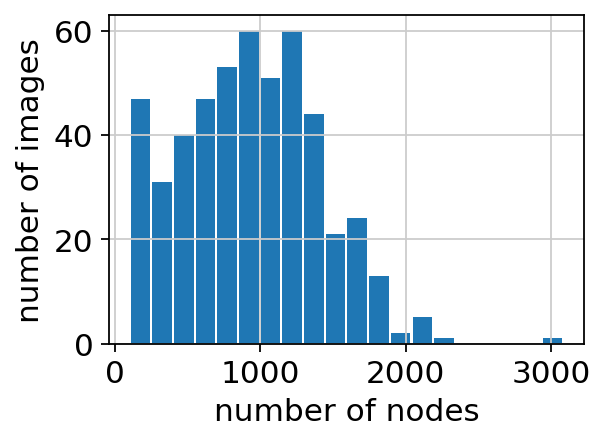

In [21]:
plt.figure(figsize=(4,3))
plt.hist(nr_nodes, bins = 20, stacked=True, rwidth=0.9)
plt.xlabel('number of nodes')
plt.ylabel('number of images')
# plt.legend()

if save is not None:
    plt.tight_layout()
    plt.savefig(save + '_hist_nr_nodes_dpi80' + suffix)
plt.show()

In [14]:
print('min:', np.min(nr_nodes), '     max:', np.max(nr_nodes))

min: 100      max: 3085


In [15]:
print("mean number of nodes:", np.mean(nr_nodes))

mean number of nodes: 929.23


In [16]:
print("median number of nodes:", np.median(nr_nodes))

median number of nodes: 924.5


#### Degree vs Distance

In [17]:
dists = np.square(np.arange(6, 50, 2)) // 4

1.5947432771762686
4.870140526379019
10.470587695999576
19.997823514966914
34.69233898699114
55.791285028870675
84.37583550514123
121.20443679286367
166.76495919411292
221.1904892967798
284.0256692187216
354.342354652219
430.700945697153
511.02254154480494
592.6899869352279
672.3457050415643
746.1028597825679
810.0014638988395
860.2990053154101
894.7600014472705
914.6610969247577
924.2147475169594


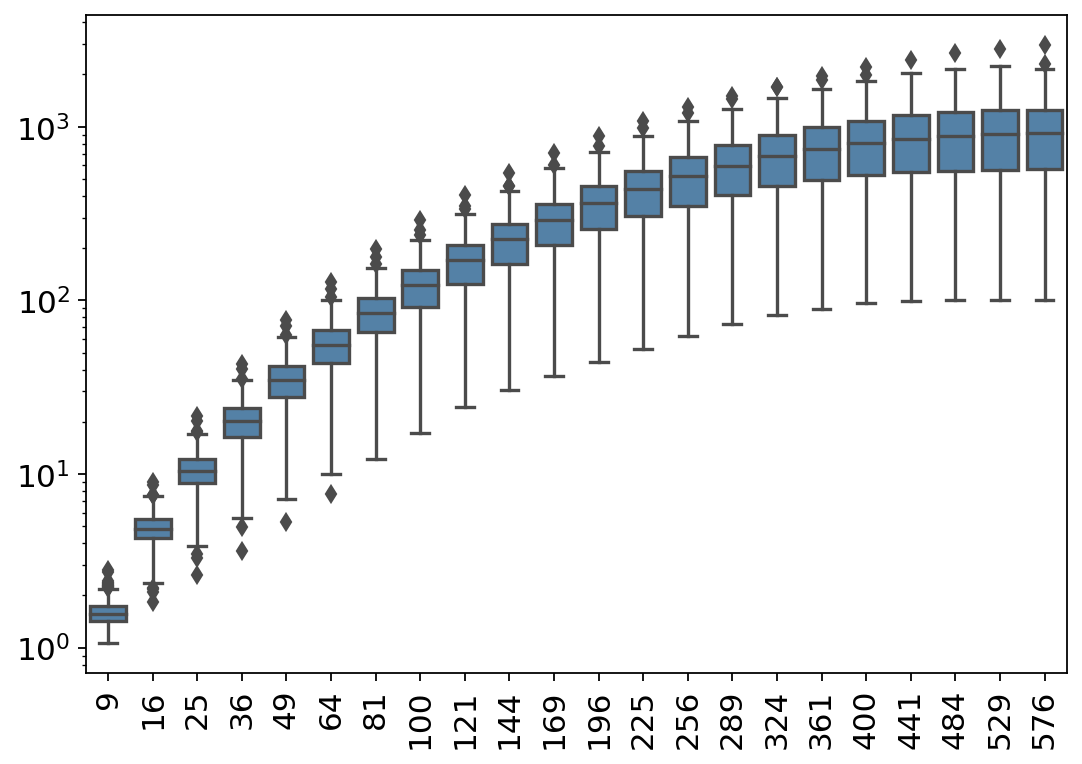

In [18]:
interpreter.data.plot_degree_vs_dist(
    max_distances=dists,
    save = save + '_all_dpi80',
    panel_width=7,
    panel_height=5,
)

2.0105941357649213
7.079625999997357
42.63177582108964


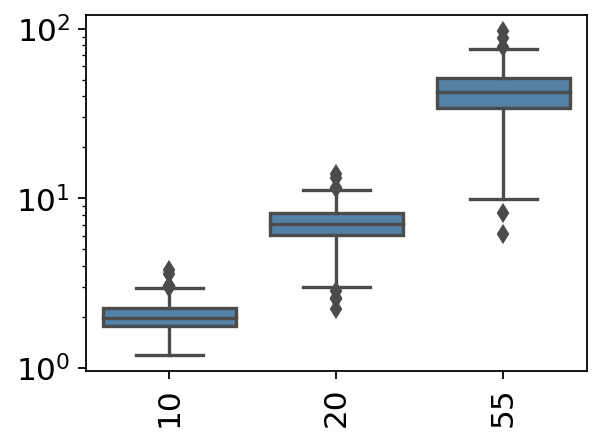

In [19]:
interpreter.data.plot_degree_vs_dist(
    max_distances=[10, 20, 55],
    save = save+'_small_dpi80',
)

#### Node feature transformation

In [25]:
keys = ['527', '297', '211', '420', '371', '326', '442', '218', '88', '456', '413', '364', '138', '451']

/lustre/groups/ml01/workspace/mayar.ali/tissue/data/metabric/refactored/buffer/buffered_data_20_fine.pickle
Loading data from buffer
Loaded 500 images with complete data from 467 patients over 477856 cells with 39 cell features and 9 distinct celltypes.

Whole dataset: 500 images from 454 patients.
Test dataset: 48 images from 45 patients.
Training dataset: 405 images from 368 patients.
Validation dataset: 47 images from 41 patients.



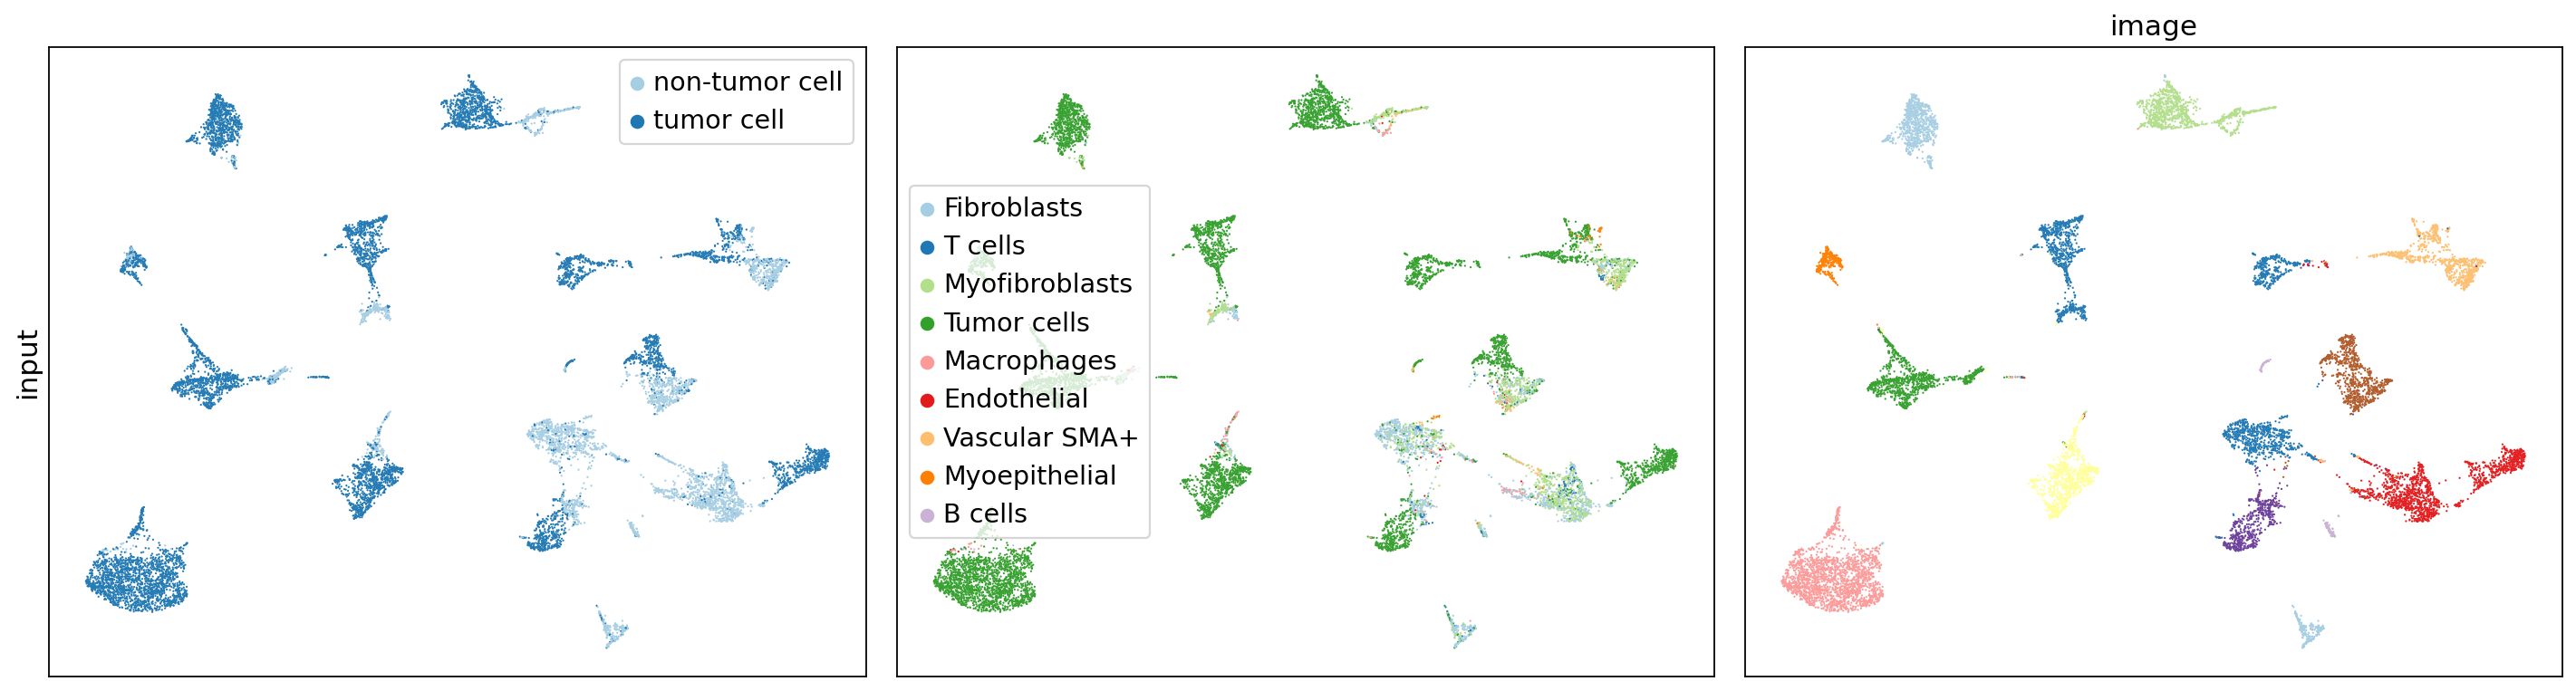

/lustre/groups/ml01/workspace/mayar.ali/tissue/data/metabric/refactored/buffer/buffered_data_20_fine.pickle
Loading data from buffer
Loaded 500 images with complete data from 467 patients over 477856 cells with 39 cell features and 9 distinct celltypes.

Whole dataset: 500 images from 454 patients.
Test dataset: 48 images from 45 patients.
Training dataset: 405 images from 368 patients.
Validation dataset: 47 images from 41 patients.



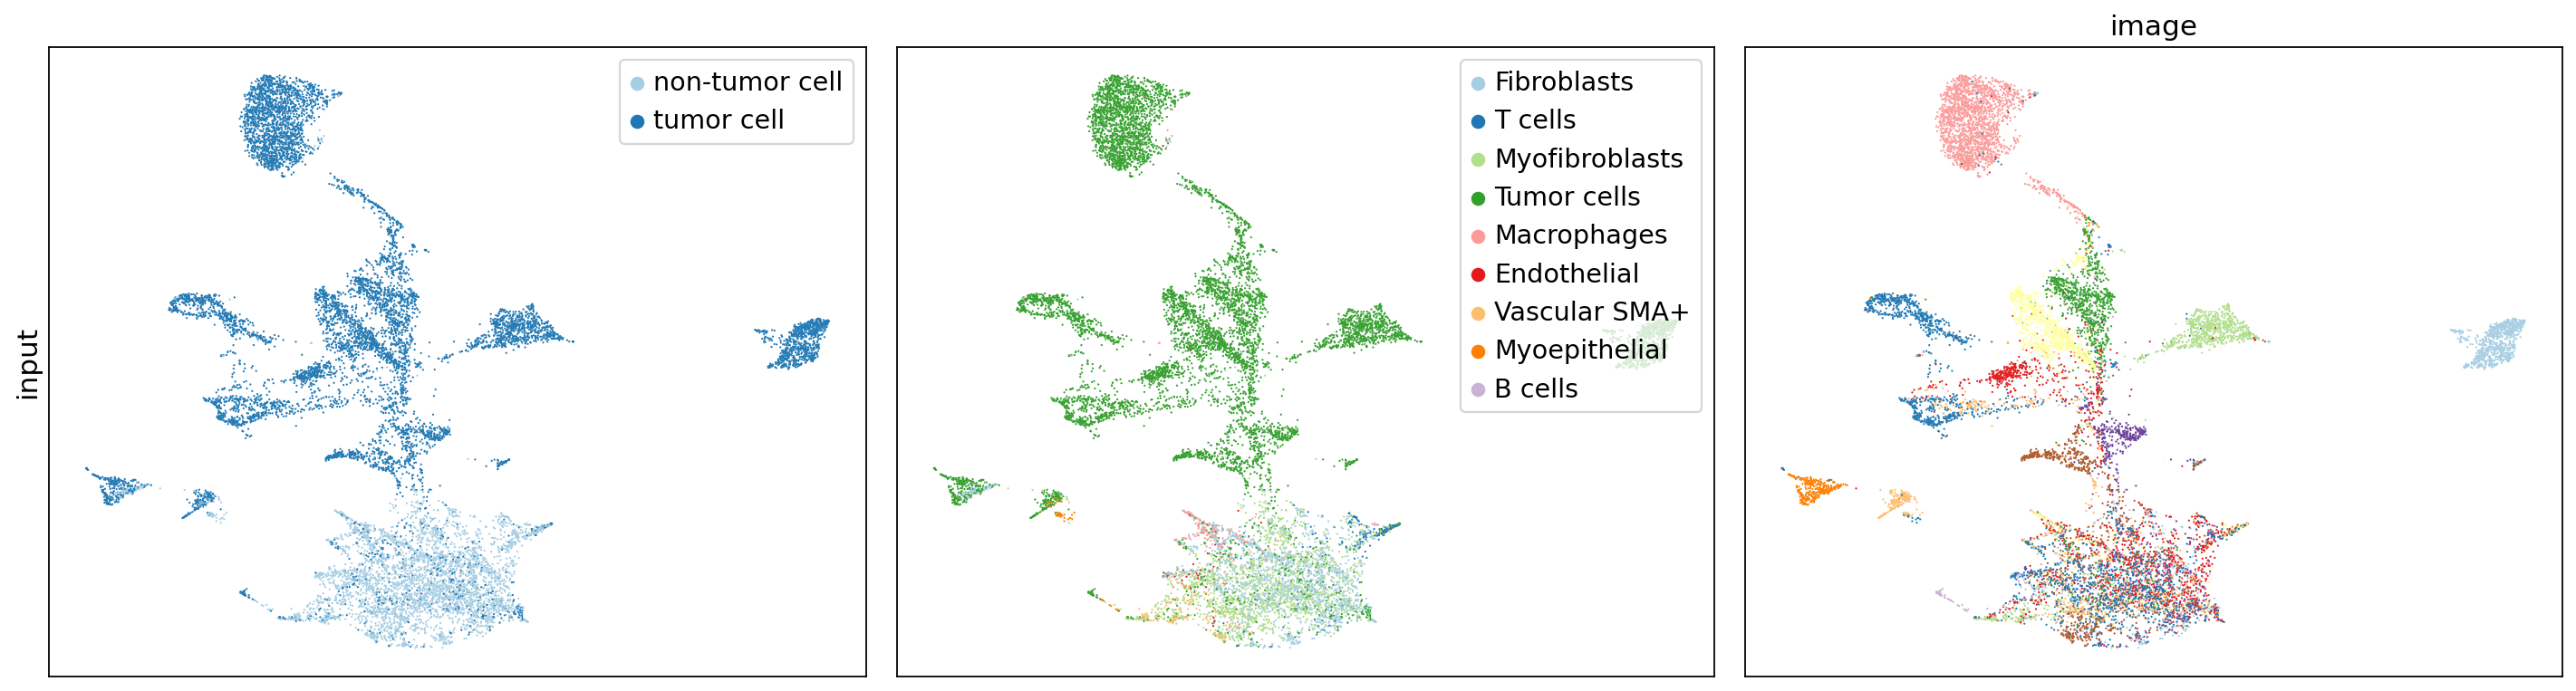

/lustre/groups/ml01/workspace/mayar.ali/tissue/data/metabric/refactored/buffer/buffered_data_20_fine.pickle
Loading data from buffer
Loaded 500 images with complete data from 467 patients over 477856 cells with 39 cell features and 9 distinct celltypes.

Whole dataset: 500 images from 454 patients.
Test dataset: 48 images from 45 patients.
Training dataset: 405 images from 368 patients.
Validation dataset: 47 images from 41 patients.



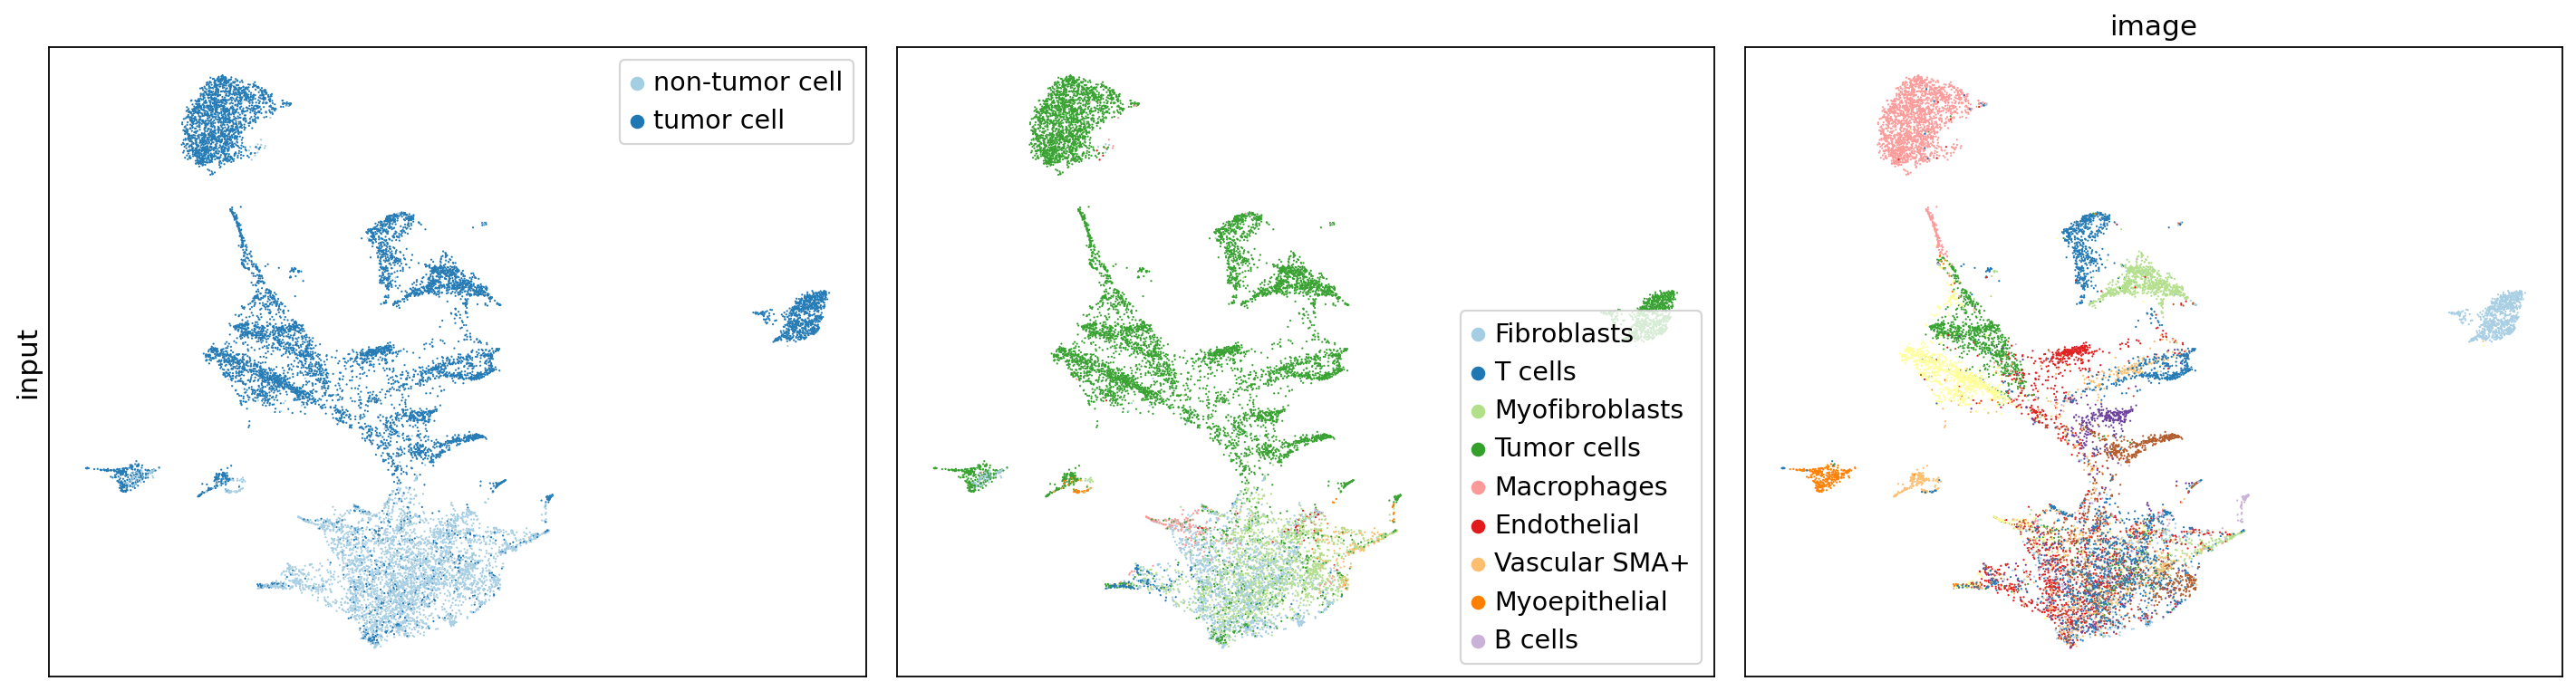

In [26]:
if save is not None:
    filename = save + '_subset_images_dpi80'
else:
    filename = None
    
for transform in ['standardize_per_image', 'standardize_globally', 'none']:
    interpreter.get_data(
        data_origin=data_origin,
        data_path=raw_path,
        buffered_data_path=buffered_data_path,
        write_buffer=False,
        radius=20,
        target_label=grade_name,
        graph_label_selection=[grade_name, survival_name],
        graph_covar_selection=[],
        node_feature_transformation=transform,
        adj_type="full",
    )
    interpreter.plot_umap_nodes(
        keys,
        save = filename + transform,
        plot_types = ['tumor', 'types', 'images'],
        layer_names=['input'],
        panel_height=5,
        panel_width=6,
    )